In [1]:
import pandas as pd 
import numpy as np
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

test = pd.read_csv('..\source\pred3.csv')
test

,DateTime,Open,Close,Predicted
0,2021-01-08,580.0,580.0,562.149658
1,2021-01-11,577.0,584.0,570.675110
2,2021-01-12,583.0,591.0,576.199524
3,2021-01-13,595.0,605.0,580.838501
4,2021-01-14,587.0,592.0,584.301941
...,...,...,...,...
479,2022-12-22,466.5,468.0,470.744110
480,2022-12-23,457.5,455.0,468.687714
481,2022-12-26,454.0,456.5,466.245728
482,2022-12-27,458.0,457.0,462.377960


In [2]:
test.loc[test.Close.shift(1) >= test.Close, "Trend"]= 0
test.loc[test.Close.shift(1) < test.Close, "Trend"]= 1
test['Trend']=test['Trend'].fillna(0).astype(int)
test.loc[test.Predicted.shift(1) >= test.Predicted, "PredTrend"]= 0
test.loc[test.Predicted.shift(1) < test.Predicted, "PredTrend"]= 1
test['PredTrend']=test['PredTrend'].fillna(0).astype(int)
test.loc[test.Predicted.shift(1) >= test.Close.shift(1), "PredvsTrend"]= 0
test.loc[test.Predicted.shift(1) < test.Close.shift(1), "PredvsTrend"]= 1
test['PredvsTrend']=test['PredvsTrend'].fillna(0).astype(int)
test

,DateTime,Open,Close,Predicted,Trend,PredTrend,PredvsTrend
0,2021-01-08,580.0,580.0,562.149658,0,0,0
1,2021-01-11,577.0,584.0,570.675110,1,1,1
2,2021-01-12,583.0,591.0,576.199524,1,1,1
3,2021-01-13,595.0,605.0,580.838501,1,1,1
4,2021-01-14,587.0,592.0,584.301941,0,1,1
...,...,...,...,...,...,...,...
479,2022-12-22,466.5,468.0,470.744110,1,0,0
480,2022-12-23,457.5,455.0,468.687714,0,0,0
481,2022-12-26,454.0,456.5,466.245728,1,0,0
482,2022-12-27,458.0,457.0,462.377960,1,0,0


In [3]:
test.corr()['PredTrend']

Open           0.134466
Close          0.148419
Predicted      0.097943
Trend          0.268529
PredTrend      1.000000
PredvsTrend    0.372705
Name: PredTrend, dtype: float64

In [4]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(test.Trend, test.PredTrend)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(test.Trend, test.PredTrend)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(test.Trend, test.PredTrend)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(test.Trend, test.PredTrend)
print('F1 score: %f' % f1)

Accuracy: 0.638430
Precision: 0.581818
Recall: 0.606635
F1 score: 0.593968


In [5]:
test['status'] = test.PredTrend.shift(1).fillna(0).astype(int)


# test['status2']=test.status
# test.loc[( (test.status.shift(1)==0) & (test.status==1) ) & (test.Close.shift(1)<=test.Close.shift(2)) & (test.Open <= test.Close.shift(1)) , "status2"]= 0
# test.loc[( (test.status.shift(1)==1) & (test.status==0) ) & (test.Close.shift(1)>=test.Close.shift(2)) & (test.Open <= test.Close.shift(1)) , "status2"]= 1
# # test['status2']=test['status2'].fillna(0).astype(int)
# # test['status2']=test['status2']

# # 做一條predict的均線試看看

# test['status3']= test.PredvsTrend.shift(1).fillna(0).astype(int)
# test.loc[( (test.PredvsTrend.shift(1)==0) & (test.PredvsTrend==1) ) & (test.Close.shift(1)<=test.Close.shift(2)) & (test.Open <= test.Close.shift(1)) , "status3"]= 0
# test.loc[( (test.PredvsTrend.shift(1)==1) & (test.PredvsTrend==0) ) & (test.Close.shift(1)>=test.Close.shift(2)) & (test.Open <= test.Close.shift(1)) , "status3"]= 1



# .shift(1)是前一個

test['buy_cost'] = test.Open[np.where((test.status == 1) * (test.status.shift(1) == 0))[0]]
test['sell_cost'] = test.Open[np.where((test.status == 0) * (test.status.shift(1) == 1))[0]]
test

,DateTime,Open,Close,Predicted,Trend,PredTrend,PredvsTrend,status,buy_cost,sell_cost
0,2021-01-08,580.0,580.0,562.149658,0,0,0,0,NaN,NaN
1,2021-01-11,577.0,584.0,570.675110,1,1,1,0,NaN,NaN
2,2021-01-12,583.0,591.0,576.199524,1,1,1,1,583.0,NaN
3,2021-01-13,595.0,605.0,580.838501,1,1,1,1,NaN,NaN
4,2021-01-14,587.0,592.0,584.301941,0,1,1,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
479,2022-12-22,466.5,468.0,470.744110,1,0,0,0,NaN,NaN
480,2022-12-23,457.5,455.0,468.687714,0,0,0,0,NaN,NaN
481,2022-12-26,454.0,456.5,466.245728,1,0,0,0,NaN,NaN
482,2022-12-27,458.0,457.0,462.377960,1,0,0,0,NaN,NaN


In [6]:
test = test.fillna(0)
buy_cost = np.array(test.buy_cost[test.buy_cost != 0])
sell_price = np.array(test.sell_cost[test.sell_cost != 0])
buy_cost

array([583. , 595. , 611. , 601. , 615. , 588. , 600. , 606. , 604. ,
       592. , 594. , 596. , 563. , 576. , 598. , 590. , 602. , 585. ,
       599. , 590. , 600. , 581. , 581. , 590. , 579. , 595. , 562. ,
       575. , 604. , 600. , 595. , 597. , 605. , 598. , 607. , 657. ,
       644. , 639. , 633. , 574. , 583. , 581. , 599. , 585. , 577. ,
       558. , 533. , 521. , 522. , 538. , 539. , 501. , 470. , 458. ,
       481. , 509. , 506. , 509. , 526. , 485. , 473.5, 444.5, 400. ,
       384.5, 390. , 473. ])

In [7]:
if len(buy_cost) > len(sell_price) :
    buy_cost = buy_cost[:-1]

trade_return = sell_price / buy_cost - 1
fee = 0.002
net_trade_return = trade_return - fee

In [8]:
test['trade_ret'] = 0
test['net_trade_ret'] = 0
sell_dates = test.sell_cost[test.sell_cost != 0].index
test.loc[sell_dates, 'trade_ret'] = trade_return
test.loc[sell_dates, 'net_trade_ret'] = net_trade_return
test

,DateTime,Open,Close,Predicted,Trend,PredTrend,PredvsTrend,status,buy_cost,sell_cost,trade_ret,net_trade_ret
0,2021-01-08,580.0,580.0,562.149658,0,0,0,0,0.0,0.0,0.0,0.0
1,2021-01-11,577.0,584.0,570.675110,1,1,1,0,0.0,0.0,0.0,0.0
2,2021-01-12,583.0,591.0,576.199524,1,1,1,1,583.0,0.0,0.0,0.0
3,2021-01-13,595.0,605.0,580.838501,1,1,1,1,0.0,0.0,0.0,0.0
4,2021-01-14,587.0,592.0,584.301941,0,1,1,1,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
479,2022-12-22,466.5,468.0,470.744110,1,0,0,0,0.0,0.0,0.0,0.0
480,2022-12-23,457.5,455.0,468.687714,0,0,0,0,0.0,0.0,0.0,0.0
481,2022-12-26,454.0,456.5,466.245728,1,0,0,0,0.0,0.0,0.0,0.0
482,2022-12-27,458.0,457.0,462.377960,1,0,0,0,0.0,0.0,0.0,0.0


In [9]:
test['open_ret'] = test.Open / test.Open.shift(1) - 1
test['strategy_ret'] = test.status.shift(1) * test.open_ret
test['strategy_net_ret'] = test.strategy_ret
test.loc[sell_dates, 'strategy_net_ret'] = test.loc[sell_dates, 'strategy_net_ret'] - fee
test = test.fillna(0)

In [10]:
test['buy_and_hold_equity'] = (test.open_ret + 1).cumprod()
test['strategy_equity'] = (test.strategy_ret + 1).cumprod()
test['strategy_net_equity'] = (test.strategy_net_ret + 1).cumprod()
test

,DateTime,Open,Close,Predicted,Trend,PredTrend,PredvsTrend,status,buy_cost,sell_cost,trade_ret,net_trade_ret,open_ret,strategy_ret,strategy_net_ret,buy_and_hold_equity,strategy_equity,strategy_net_equity
0,2021-01-08,580.0,580.0,562.149658,0,0,0,0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
1,2021-01-11,577.0,584.0,570.675110,1,1,1,0,0.0,0.0,0.0,0.0,-0.005172,-0.000000,-0.000000,0.994828,1.000000,1.000000
2,2021-01-12,583.0,591.0,576.199524,1,1,1,1,583.0,0.0,0.0,0.0,0.010399,0.000000,0.000000,1.005172,1.000000,1.000000
3,2021-01-13,595.0,605.0,580.838501,1,1,1,1,0.0,0.0,0.0,0.0,0.020583,0.020583,0.020583,1.025862,1.020583,1.020583
4,2021-01-14,587.0,592.0,584.301941,0,1,1,1,0.0,0.0,0.0,0.0,-0.013445,-0.013445,-0.013445,1.012069,1.006861,1.006861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,2022-12-22,466.5,468.0,470.744110,1,0,0,0,0.0,0.0,0.0,0.0,0.014130,0.000000,0.000000,0.804310,1.600329,1.401493
480,2022-12-23,457.5,455.0,468.687714,0,0,0,0,0.0,0.0,0.0,0.0,-0.019293,-0.000000,-0.000000,0.788793,1.600329,1.401493
481,2022-12-26,454.0,456.5,466.245728,1,0,0,0,0.0,0.0,0.0,0.0,-0.007650,-0.000000,-0.000000,0.782759,1.600329,1.401493
482,2022-12-27,458.0,457.0,462.377960,1,0,0,0,0.0,0.0,0.0,0.0,0.008811,0.000000,0.000000,0.789655,1.600329,1.401493


Text(0, 0.5, 'strategy_equity')

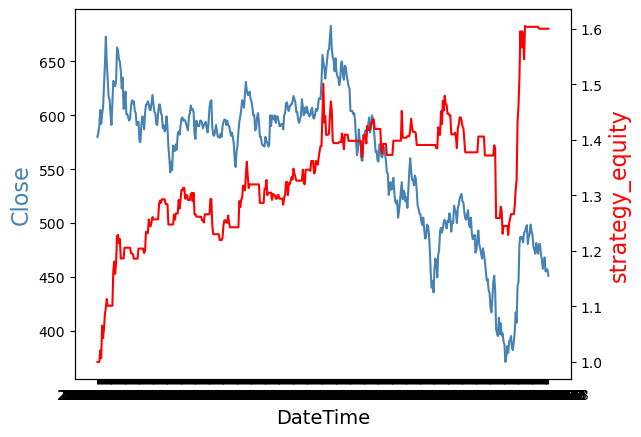

In [11]:
import matplotlib.pyplot as plt
col1 = 'steelblue'
col2 = 'red'
col3 = 'green'
fig2,ax = plt.subplots()
ax.plot(test.DateTime, test.Close, color=col1)
ax.set_xlabel('DateTime', fontsize=14)
ax.set_ylabel('Close', color=col1, fontsize=16)
ax2 = ax.twinx()
ax2.plot(test.DateTime, test.strategy_equity, color=col2)
ax2.set_ylabel('strategy_equity', color=col2, fontsize=16)

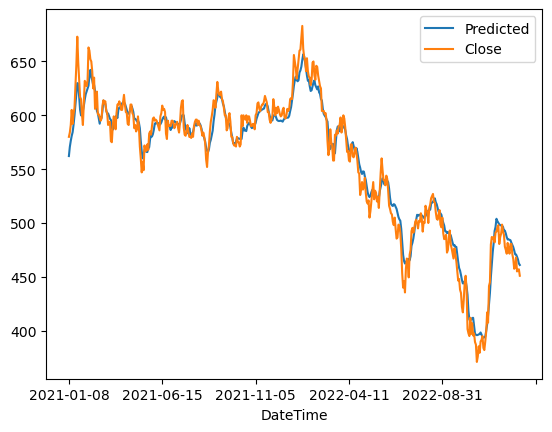

In [12]:
plot=test.plot(x='DateTime',y=['Predicted','Close'])
fig = plot.get_figure()